<a href="https://colab.research.google.com/github/josue2510/Data_science_2020_election_support/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from textblob import TextBlob#libreria para procesar datos de texto
import nltk#kit de herramientas de lenguaje natural
import pandas as pd
from collections import Counter#subclase que cuenta objetos y almacena los elementos en un diccionario
from matplotlib import pyplot as plt
import numpy as np
from  tqdm import tqdm#libreria que mide el progreso de los loops
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
tweets = pd.read_csv('/content/drive/MyDrive/tweets.csv', sep=',')
tweets.tweet = tweets.tweet.astype(str)

In [5]:
#Contamos la cantidad de veces que se repite el nombre de un candidato en cada tweet
count = []
for i in tqdm(range(tweets.shape[0])):
    count.append({'biden': tweets['tweet'].iloc[i].count('biden'),
                  'trump': tweets['tweet'].iloc[i].count('trump')})
candidates_count = pd.DataFrame.from_dict(count)
tweets = tweets.join(candidates_count)

100%|██████████| 2144766/2144766 [00:55<00:00, 38642.87it/s]


In [6]:
def getPolarity(text):
  '''Calcula la polaridad del texto recibido
    Args:
        text: str
    Returns: float
  '''
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  '''Clasifica el texto en base a la polaridad obtenida
    Args:
        score: float
    Returns: str
  '''
  if score < 0:
    return 'negative'
  elif score==0:
    return 'neutral'
  else:
     return 'positive'

In [7]:
tweets['polarity']    = tweets['tweet'].apply(getPolarity)
tweets['analysis']    = tweets['polarity'].apply(getAnalysis)
tweets.head()

,tweet,likes,retweets,date,biden,trump,polarity,analysis
0,farewell president trump past 4 years turn entertained shocked appalled amused dismayed horrified angered infuriated gobsmacked entire planet trump congratulations presidentelect biden oil troubled waters bidenharris2020,0,0,2020-11-08,2,2,-0.50,negative
1,congratulations joe biden 46th american president elect bidenharris2020 joebidenkamalaharris2020 joebiden trumpout trumpasylumplans,0,0,2020-11-08,4,2,0.40,positive
2,joebiden the bible tells season time build time reap time sow time heal het exacte citaat time kill time heal time tear time build ecclesiastes 33 bidenharris2020 trumpout,1,0,2020-11-08,2,1,0.00,neutral
3,wterrence youre upset youll real job now joebiden president,0,0,2020-11-08,1,0,0.20,positive
4,bs levels rose high heres 46 trump vote joebiden dumptrump presidenttrump,2,0,2020-11-08,1,3,0.38,positive


In [8]:
def text_plot(y):
  for c, value in enumerate(y): 
    plt.text(c-0.08, value, str(value)) 

Text(0.5, 1.0, 'Análisis de sentimientos')

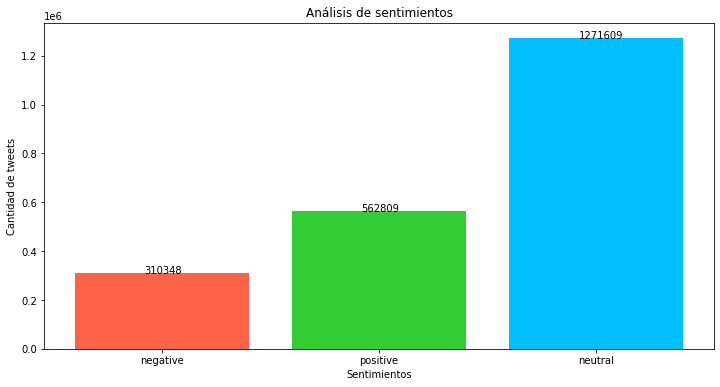

In [9]:
#Representación de la cantidad de tweets positivos, negativos y neutrales
sentiment_cnt = Counter(tweets.analysis)
plt.figure(figsize=(12,6))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values(), color=['tomato', 'limegreen', 'deepskyblue'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title('Análisis de sentimientos')

In [10]:
sentiment_cnt = Counter(tweets.analysis)
sentiment_cnt

Counter({'negative': 310348, 'neutral': 1271609, 'positive': 562809})

Text(0.5, 1.0, 'Análisis de sentimientos tweets con más likes.')

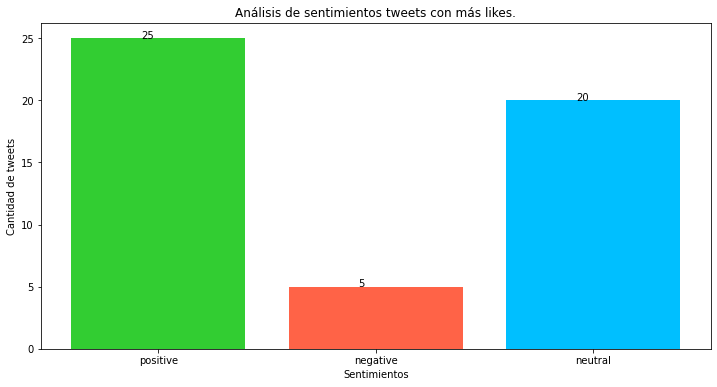

In [11]:
#Twitters más virales de acuerdo a la cantidad de likes
most_liked = tweets.sort_values('likes', ascending= False).head(50)
sentiment_cnt = Counter(most_liked.analysis)
plt.figure(figsize=(12,6))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values(), color=['limegreen', 'tomato', 'deepskyblue'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title("Análisis de sentimientos tweets con más likes.")

Text(0.5, 1.0, 'Análisis de sentimientos tweets con más retweets.')

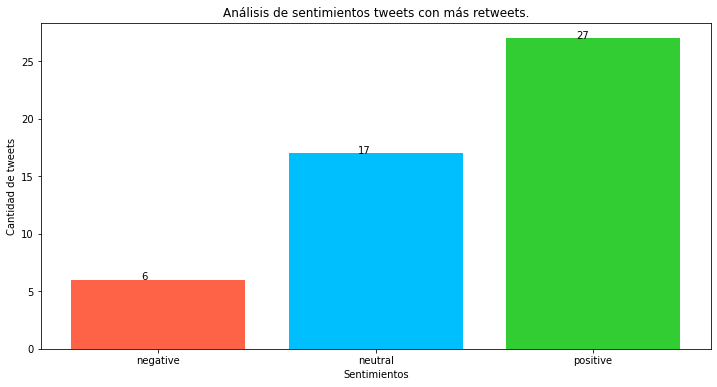

In [12]:
#Twitters más virales de acuerdo a la cantidad de retweets
most_retweeted = tweets.sort_values('retweets', ascending= False).head(50)
sentiment_cnt = Counter(most_retweeted.analysis)
plt.figure(figsize=(12,6))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values(), color=['tomato','deepskyblue', 'limegreen'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title("Análisis de sentimientos tweets con más retweets.")

Text(0.5, 1.0, 'Análisis de sentimientos tweets que mencionan más a Biden.')

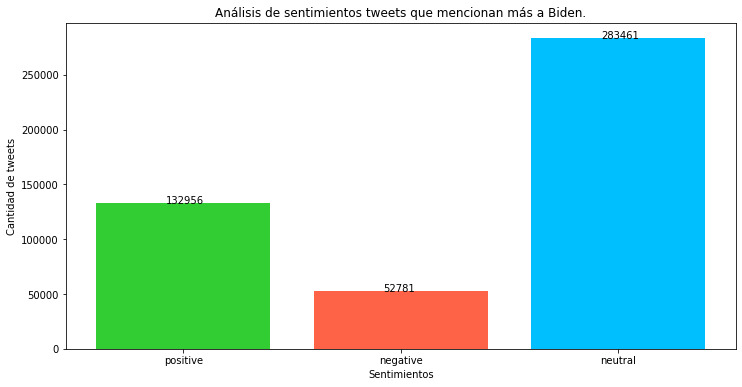

In [13]:
#Sentimiento de los tweets que mencionan a Biden y no a Trump
biden_tweets = tweets[tweets.biden.apply(lambda x: x>0) & tweets.trump.apply(lambda x: x==0)]
sentiment_cnt = Counter(biden_tweets.analysis)
plt.figure(figsize=(12,6))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values(), color=['limegreen','tomato', 'deepskyblue'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title("Análisis de sentimientos tweets que mencionan más a Biden.")

Text(0.5, 1.0, 'Análisis de sentimientos tweets que mencionan más a Trump.')

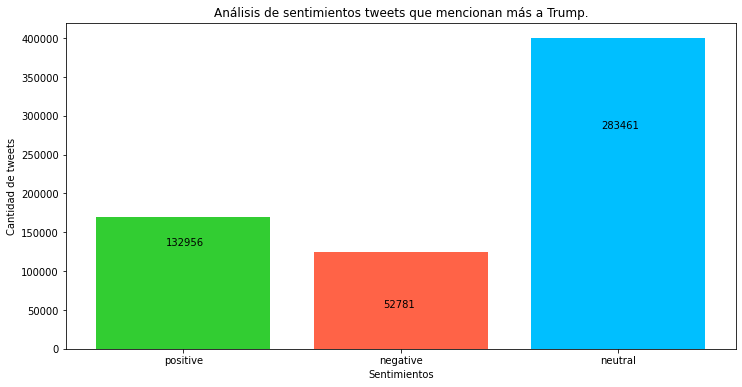

In [14]:
#Sentimiento de los tweets que mencionan a Trump y no a Biden
trump_tweets = tweets[tweets.trump.apply(lambda x: x>0) & tweets.biden.apply(lambda x: x==0)]
target_cnt = Counter(trump_tweets.analysis)
plt.figure(figsize=(12,6))
plt.bar(target_cnt.keys(), target_cnt.values(), color=['limegreen','tomato', 'deepskyblue'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title("Análisis de sentimientos tweets que mencionan más a Trump.")